This dataset contains Real Estate listings in the US broken by State and zip code. The dataset contains 13 states in the United States and they are
<ul>
    <li>Connecticut</li>
    <li>Delaware</li>
    <li>Massachusetts</li>
    <li>Maine</li>
    <li>New Hampshire</li>
    <li>New Jersey</li>
    <li>New York</li>
    <li>Rhode Island</li>
    <li>Pennsylvania</li>
    <li>Vermont</li>
    <li>Virgin Islands</li>
    <li>Wyoming</li>
</ul>

The dataset has the following features
<ul>
    <li>status</li>
    <li>price</li>
    <li>bed</li>
    <li>acre_lot</li>
    <li>full_address</li>
    <li>street</li>
    <li>city</li>
    <li>state</li>
    <li>zip_code</li>
    <li>house_size</li>
    <li>sold_date</li>
</ul>

## Research Questions
<ul>
    <li>How does house prices vary based on this data?</li>
    <li>What ar the correlation between house prices and other attributes?</li>
</ul>

In [1]:
import warnings
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import ppscore as ps
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df_raw = pd.read_csv("realtor-data.csv")

In [4]:
# Check the number of rows and columns
df_raw.shape

(923159, 12)

### There are 923159  rows of observations and 12 columns/features

In [5]:
# Get info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [6]:
# Get the first few rows
df_raw.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
df_raw["state"].value_counts()

New Jersey        233722
New York          211778
Massachusetts     175248
Connecticut        91644
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: state, dtype: int64

We could see that data set from Puerto Rico was added is in this data. Puerto Rico is not in the United States, so this should be removed so we can look at data from United States alone.

In [8]:
df_US_States = df_raw[df_raw["state"] != "Puerto Rico"]
len(df_US_States)

898480

In [12]:
# Check if we are right
assert len(df_US_States) == len(df_raw)-len(df_raw[df_raw["state"] == "Puerto Rico"]),f"Check your data in the United States again."

In [13]:
len(df_US_States["state"].value_counts())

17

In [14]:
df_US_States.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
10334,for_sale,175000.0,5.0,2.0,0.21,"C28 Of P-C Ross New, Saint Thomas, VI, 00802",C28 Of P-C Ross New,Saint Thomas,Virgin Islands,802.0,1140.0,NaN
10335,for_sale,100000.0,9.0,5.0,0.04,"79 Altona and Welgust, Saint Thomas, VI, 00802",79 Altona and Welgust,Saint Thomas,Virgin Islands,802.0,3120.0,NaN
10336,for_sale,1599000.0,4.0,6.0,1.04,"91-C Solberg Lns, Saint Thomas, VI, 00802",91-C Solberg Lns,Saint Thomas,Virgin Islands,802.0,6760.0,NaN
10337,for_sale,115000.0,NaN,1.0,NaN,"B-1 Solberg Lns, Saint Thomas, VI, 00802",B-1 Solberg Lns,Saint Thomas,Virgin Islands,802.0,235.0,NaN
10338,for_sale,925000.0,3.0,5.0,0.81,"108A-30 Contant Ss, Saint Thomas, VI, 00802",108A-30 Contant Ss,Saint Thomas,Virgin Islands,802.0,4500.0,NaN


In [15]:
len(df_US_States["state"].value_counts())

17

In [16]:
df_US_States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898480 entries, 10334 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        898480 non-null  object 
 1   price         898409 non-null  float64
 2   bed           770142 non-null  float64
 3   bath          786475 non-null  float64
 4   acre_lot      630599 non-null  float64
 5   full_address  898480 non-null  object 
 6   street        896384 non-null  object 
 7   city          898406 non-null  object 
 8   state         898480 non-null  object 
 9   zip_code      898404 non-null  float64
 10  house_size    604096 non-null  float64
 11  sold_date     456334 non-null  object 
dtypes: float64(6), object(6)
memory usage: 89.1+ MB


Some columns are not relevant for building our models and hence they should be dropped.

In [17]:
df_US_States.drop(columns=["status", "full_address", "street", "sold_date"], inplace=True)

In [18]:
df_US_States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898480 entries, 10334 to 923158
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       898409 non-null  float64
 1   bed         770142 non-null  float64
 2   bath        786475 non-null  float64
 3   acre_lot    630599 non-null  float64
 4   city        898406 non-null  object 
 5   state       898480 non-null  object 
 6   zip_code    898404 non-null  float64
 7   house_size  604096 non-null  float64
dtypes: float64(6), object(2)
memory usage: 61.7+ MB


We can remove the rows with missing values

In [19]:
df_US_States_clean = df_US_States.dropna()

In [20]:
df_US_States_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405837 entries, 10334 to 923157
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       405837 non-null  float64
 1   bed         405837 non-null  float64
 2   bath        405837 non-null  float64
 3   acre_lot    405837 non-null  float64
 4   city        405837 non-null  object 
 5   state       405837 non-null  object 
 6   zip_code    405837 non-null  float64
 7   house_size  405837 non-null  float64
dtypes: float64(6), object(2)
memory usage: 27.9+ MB


In [21]:
# Reset the dataframe
df_US_States_clean = df_US_States_clean.reset_index(drop=True)

In [22]:
df_US_States_clean.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,175000.0,5.0,2.0,0.21,Saint Thomas,Virgin Islands,802.0,1140.0
1,100000.0,9.0,5.0,0.04,Saint Thomas,Virgin Islands,802.0,3120.0
2,1599000.0,4.0,6.0,1.04,Saint Thomas,Virgin Islands,802.0,6760.0
3,925000.0,3.0,5.0,0.81,Saint Thomas,Virgin Islands,802.0,4500.0
4,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0


Change the Zip code to integer

In [23]:
df_US_States_clean["zip_code"] = df_US_States_clean["zip_code"].astype("int")

In [24]:
df_US_States_clean.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,175000.0,5.0,2.0,0.21,Saint Thomas,Virgin Islands,802,1140.0
1,100000.0,9.0,5.0,0.04,Saint Thomas,Virgin Islands,802,3120.0
2,1599000.0,4.0,6.0,1.04,Saint Thomas,Virgin Islands,802,6760.0
3,925000.0,3.0,5.0,0.81,Saint Thomas,Virgin Islands,802,4500.0
4,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802,5000.0


In [25]:
# How many datasets are we dealing with?
df_US_States_clean.shape

(405837, 8)

#### We are dealing with a lot of data. We are reduce it to like 10000. We can choose from each state

In [39]:
# Choose the the subset data from each state e.g first 1200 from Massachusetts
df_Massachusetts = df_US_States_clean[df_US_States_clean["state"] == "Massachusetts"][:1200]
df_NewJersey = df_US_States_clean[df_US_States_clean["state"] == "New Jersey"][:800]
df_Connecticut = df_US_States_clean[df_US_States_clean["state"] == "Connecticut"][:987]
df_NewYork = df_US_States_clean[df_US_States_clean["state"] == "NewYork"][:890]
df_RhodeIsland = df_US_States_clean[df_US_States_clean["state"] == "Rhode Island"][:910]
df_NewHampshire = df_US_States_clean[df_US_States_clean["state"] == "New Hampshire"][:1070]
df_Vermont = df_US_States_clean[df_US_States_clean["state"] == "Vermont"][:1060]
df_Maine = df_US_States_clean[df_US_States_clean["state"] == "Maine"][:1100]
df_Pennsylvania = df_US_States_clean[df_US_States_clean["state"] == "Pennsylvania"][:987]
df_Delaware = df_US_States_clean[df_US_States_clean["state"] == "Delaware"][:1000]
df_Virgin_Islands = df_US_States_clean[df_US_States_clean["state"] == "Virgin Islands"]
df_Wyoming = df_US_States_clean[df_US_States_clean["state"] == "Wyoming"]

In [40]:
# Combine the subsets to form the dataset for our analysis
df = pd.concat([df_Massachusetts,df_NewJersey,df_Connecticut,df_NewYork,df_RhodeIsland,df_NewHampshire,df_Vermont,df_Maine,df_Pennsylvania,df_Delaware,df_Virgin_Islands,df_Wyoming])

In [41]:
df.shape

(9459, 8)

### Check the price range to see if it makes sense

In [42]:
print(df["price"].min())
df["price"].max()

21497.0


18000000.0

The minimum house price is 21497.0.0 USD while the maximum price is 18_000_000.0 USD

In [43]:
# df_US_States_clean[df_US_States_clean["zip_code"] == 802].count()

In [44]:
df["state"].value_counts()

Massachusetts     1200
Maine             1100
New Hampshire     1070
Vermont           1060
Delaware          1000
Connecticut        987
Pennsylvania       987
Rhode Island       910
New Jersey         800
Virgin Islands     342
Wyoming              3
Name: state, dtype: int64

In [45]:
homes_per_state = df["state"].value_counts()
homes_per_state.values

array([1200, 1100, 1070, 1060, 1000,  987,  987,  910,  800,  342,    3])

In [46]:
fig = px.bar(
            x = homes_per_state.index,
            y = homes_per_state.values,
            color = homes_per_state.values,
            color_continuous_scale='spectral',
            title='Number of Homes per State')

fig.update_layout(xaxis_title='US States',
                coloraxis_showscale = False,
                yaxis_title = 'Number of Homes')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

fig.write_image("Homes_per_State.png")

In [47]:
# Create a Pie Chart
fig = px.pie(
            labels = homes_per_state.index,
            values = homes_per_state.values,
            title='Number of Homes per State',
            names = homes_per_state.index,
            hole = 0.4)

fig.update_traces(textposition='outside', textfont_size=15, textinfo = 'percent')

fig.show()

In [50]:
no_of_baths = df["bed"].value_counts()
no_of_baths.head()

3.0    3999
4.0    2452
2.0    1083
5.0     754
6.0     502
Name: bed, dtype: int64

In [51]:
fig = px.bar(
            x = no_of_baths.index,
            y = no_of_baths.values,
            color = no_of_baths.values,
            color_continuous_scale='darkmint',
            title='Bath'
    )

fig.update_layout(xaxis_title='US States',
                coloraxis_showscale = False,
                yaxis_title = 'Number of Baths')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

fig.write_image("Bath.png")

In [53]:
df["state"] = df["state"].map({'Massachusetts':0, 'New Jersey':1, 'Connecticut':2, 'New York':3, 'Rhode Island':4, 'New Hampshire':5, 'Maine':6, 'Vermont':7, 'Pennsylvania':8, 'Delaware':9,'Virgin Islands':10,'Wyoming':11, 'West Virginia':12})            

In [54]:
df.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size
342,180000.0,2.0,1.0,0.34,Agawam,0,1001,676.0
343,239900.0,3.0,1.0,0.46,Agawam,0,1001,1196.0
344,525000.0,3.0,3.0,0.45,Agawam,0,1001,2314.0
345,289900.0,3.0,2.0,0.36,Agawam,0,1001,1276.0
346,275000.0,4.0,2.0,0.11,Agawam,0,1001,1732.0


#### Drop the columns you do not need to build your machine learning models

In [56]:
df = df[["bed", "bath", "acre_lot", "state", "house_size", "price"]]
df.head()

,bed,bath,acre_lot,state,house_size,price
342,2.0,1.0,0.34,0,676.0,180000.0
343,3.0,1.0,0.46,0,1196.0,239900.0
344,3.0,3.0,0.45,0,2314.0,525000.0
345,3.0,2.0,0.36,0,1276.0,289900.0
346,4.0,2.0,0.11,0,1732.0,275000.0


In [68]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [69]:
df["price"].max()

18000000.0

In [70]:
#sns.pairplot(df, hue="price")

Text(0, 0.5, 'correlation')

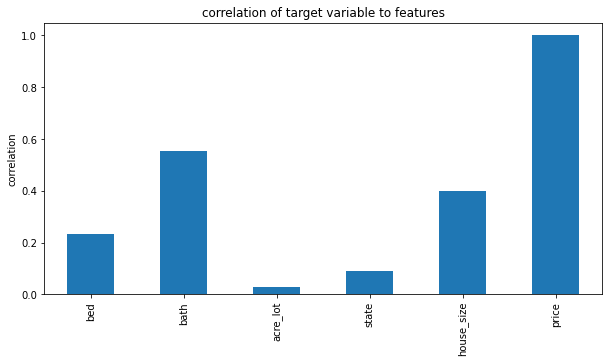

In [71]:
plt.figure(figsize=(10,5))
ax = df.corr()['price'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

In [72]:
#df.bed.info()

In [73]:
#plt.figure(figsize=(30,10));plt.subplot(121,title = 'Correletion plot')
#sns.heatmap(df.corr(),annot=True);plt.subplot(122,title='Predictive Power Score plot')
#sns.heatmap(ps.matrix(df),annot=True)

## Building the Machine Learning Model Starts from here

In [74]:
features = ["bed", "bath", "acre_lot", "state", "house_size"]
X = df[features]
y = df["price"]
print(X.head())
y.head()

   bed  bath  acre_lot  state  house_size
0  2.0   1.0      0.34      0       676.0
1  3.0   1.0      0.46      0      1196.0
2  3.0   3.0      0.45      0      2314.0
3  3.0   2.0      0.36      0      1276.0
4  4.0   2.0      0.11      0      1732.0


0    180000.0
1    239900.0
2    525000.0
3    289900.0
4    275000.0
Name: price, dtype: float64

### Split your data set into Test and Training Set

In [75]:
import tpot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import train_test_split


from sklearn.svm import SVC

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [77]:
X_train.shape

(7567, 5)

In [78]:
X_test.shape

(1892, 5)

In [79]:
X_test.head()

,bed,bath,acre_lot,state,house_size
4078,6.0,2.0,0.16,5,2736.0
4132,6.0,2.0,0.16,5,2736.0
7415,3.0,2.0,0.33,8,1012.0
7023,1.0,1.0,0.09,6,676.0
5993,2.0,2.0,1.00,7,1145.0


In [80]:
# Instantiate the models
model1 = LinearRegression()

In [81]:
# Train i.e fit your data
model1.fit(X_train, y_train)

LinearRegression()

In [82]:
# Instantiate the models
model2 = LogisticRegression()

In [86]:
# Train i.e fit your data
model2.fit(X_train, y_train)

LogisticRegression()

In [84]:
train_accuracy1 = model1.score(X_train, y_train)
test_accuracy1 = model1.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy1), 
     'Accuracy in Test  set   : {:.2f}'.format(test_accuracy1), sep='\n')

Accuracy in Train set   : 0.35
Accuracy in Test  set   : 0.39


In [87]:
train_accuracy = model2.score(X_train, y_train)
test_accuracy = model2.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.01
Accuracy in Test  set   : 0.01


### Bin the house prices for prediction

In [89]:
df_bins3= df.copy()

In [90]:
df_bins3.head()

,bed,bath,acre_lot,state,house_size,price
0,2.0,1.0,0.34,0,676.0,180000.0
1,3.0,1.0,0.46,0,1196.0,239900.0
2,3.0,3.0,0.45,0,2314.0,525000.0
3,3.0,2.0,0.36,0,1276.0,289900.0
4,4.0,2.0,0.11,0,1732.0,275000.0


In [97]:
bins = [21000,300000,1000000,18000000]

labels = [0,1,2] # 'Average Price'=0,'Expensive'=1, 'Very Expensive'=2

df_bins3['price_range']= pd.cut(x=df_bins3['price'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_bins3[['price_range','price']].head(5))

  price_range     price
0           0  180000.0
1           0  239900.0
2           1  525000.0
3           0  289900.0
4           0  275000.0


Text(0.5, 1.0, 'House Prices')

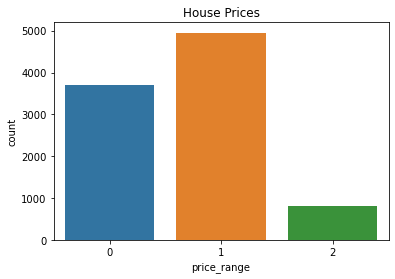

In [98]:
sns.countplot(data=df_bins3, x="price_range").set_title("House Prices")

In [99]:
X = df_bins3.drop(columns=['price_range', 'price'],axis=1) 
y = df_bins3.price_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [103]:
df_bins3.head()

,bed,bath,acre_lot,state,house_size,price,price_range
0,2.0,1.0,0.34,0,676.0,180000.0,0
1,3.0,1.0,0.46,0,1196.0,239900.0,0
2,3.0,3.0,0.45,0,2314.0,525000.0,1
3,3.0,2.0,0.36,0,1276.0,289900.0,0
4,4.0,2.0,0.11,0,1732.0,275000.0,0


In [104]:
print(f"The min and max bed is {df_bins3['bed'].min()} & {df_bins3['bed'].max()}")
print(f"The min and max bath is {df_bins3['bath'].min()} & {df_bins3['bath'].max()}")
print(f"The min and max acre_lot is {df_bins3['acre_lot'].min()} & {df_bins3['acre_lot'].max()}")
print(f"The min and max house size is {df_bins3['house_size'].min()} & {df_bins3['house_size'].max()}")

The min and max bed is 1.0 & 28.0
The min and max bath is 1.0 & 19.0
The min and max acre_lot is 0.0 & 13697.0
The min and max house size is 249.0 & 49658.0


In [105]:
df_bins3["house_size"].value_counts().index

Float64Index([2600.0, 1200.0, 1500.0, 1800.0, 2000.0,  960.0, 1008.0, 1248.0,
              1116.0, 3300.0,
              ...
              2228.0, 2976.0, 4247.0, 4230.0, 1953.0, 4608.0, 2749.0, 7105.0,
              8662.0, 2968.0],
             dtype='float64', length=2376)

In [106]:
# Instantiate the models
model1 = LinearRegression()
# Train i.e fit your data
model1.fit(X_train, y_train)

LinearRegression()

In [107]:
# Instantiate the models
model2 = LogisticRegression()
# Train i.e fit the data
model2.fit(X_train, y_train)

LogisticRegression()

In [108]:
train_accuracy1 = model1.score(X_train, y_train)
test_accuracy1 = model1.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy1), 
     'Accuracy in Test  set   : {:.2f}'.format(test_accuracy1), sep='\n')

Accuracy in Train set   : 0.34
Accuracy in Test  set   : 0.36


In [109]:
train_accuracy2 = model2.score(X_train, y_train)
test_accuracy2 = model2.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy2), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy2), sep='\n')

Accuracy in Train set   : 0.62
Accuracy in Test  set   : 0.62


In [110]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [111]:
AutoML.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8907103648607707

Generation 2 - Current best internal CV score: 0.8907103648607707

Generation 3 - Current best internal CV score: 0.8911060548779794

Generation 4 - Current best internal CV score: 0.8915025306873673

Generation 5 - Current best internal CV score: 0.8928236219606214

Best pipeline: XGBClassifier(CombineDFs(input_matrix, GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=4, max_features=0.2, min_samples_leaf=20, min_samples_split=14, n_estimators=100, subsample=0.2)), learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)


TPOTClassifier(generations=5, verbosity=2)

In [112]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [113]:
AutoML.fit(X,y)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7339040609630798

Generation 2 - Current best internal CV score: 0.7340103841161483

Generation 3 - Current best internal CV score: 0.745532526946938

Generation 4 - Current best internal CV score: 0.745532526946938

Generation 5 - Current best internal CV score: 0.745532526946938

Best pipeline: KNeighborsClassifier(RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.2, min_samples_leaf=20, min_samples_split=8, n_estimators=100), n_neighbors=91, p=1, weights=distance)


TPOTClassifier(generations=5, verbosity=2)

In [114]:
#save model 
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(model2,f)

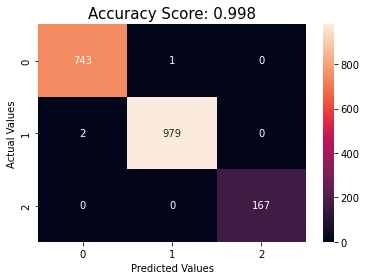

In [115]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [116]:
AutoML.export('pipeline.py')

In [117]:
y_model1_predict = model1.predict(X_test)

In [118]:
y_model1_predict[:6]

array([0.80350284, 0.50235739, 0.73091107, 0.79633809, 1.05540979,
       1.29848327])

In [119]:
y_test.head(6)

7672    1
3369    0
1444    1
2879    1
4863    1
7134    2
Name: price_range, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [120]:
# Save the clean dataFrame as a CSV
df.to_csv("real-estate.csv")